In [1]:
import pandas as pd
import csv
from scipy.interpolate import interp1d
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
data = pd.read_csv('080923nucl.csv', names = ['Temperature', 'Absorption'])

In [17]:
data

,Temperature,Absorption
0,38.3070,0.351907
1,38.7333,0.351826
2,39.1739,0.352305
3,39.5932,0.352102
4,40.0258,0.352315
...,...,...
61,65.0673,0.464228
62,65.5168,0.464144
63,65.9617,0.465388
64,66.3868,0.464367


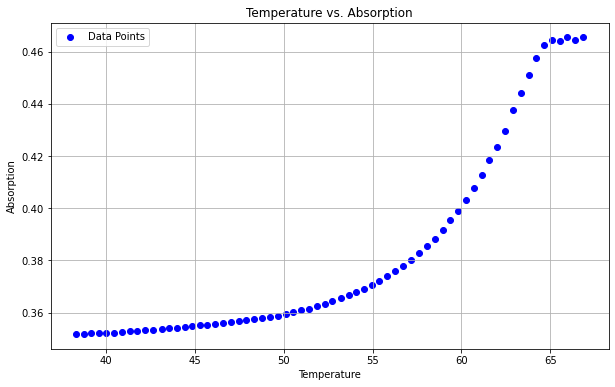

In [23]:
# Read the CSV file
data = pd.read_csv('080923nucl.csv', names=['Temperature', 'Absorption'])

# Extract the Temperature and Absorption columns
temperature = data['Temperature']
absorption = data['Absorption']

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(temperature, absorption, marker='o', color='b', label='Data Points')
plt.title('Temperature vs. Absorption')
plt.xlabel('Temperature')
plt.ylabel('Absorption')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


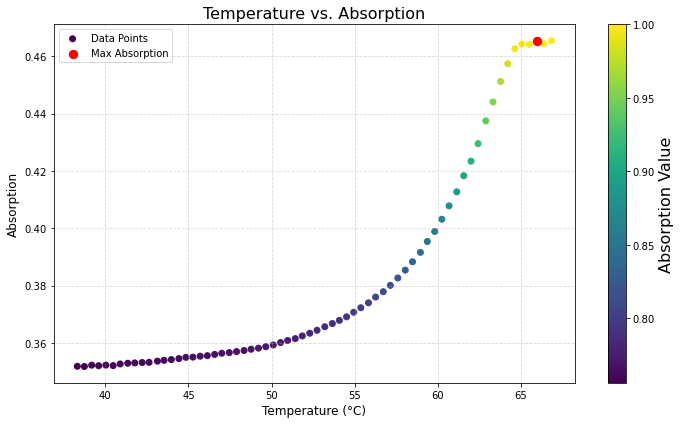

In [29]:


# Read the CSV file
data = pd.read_csv('080923nucl.csv', names=['Temperature', 'Absorption'])

# Extract the Temperature and Absorption columns
temperature = data['Temperature']
absorption = data['Absorption']

# Find the index of the maximum absorption value
max_absorption_index = absorption.idxmax()
max_absorption_temperature = temperature[max_absorption_index]
max_absorption_value = absorption[max_absorption_index]

# Create a color map based on absorption values
colors = absorption / max(absorption)

# Create a scatter plot with custom colors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(temperature, absorption, c=colors, cmap='viridis', marker='o', label='Data Points')
plt.title('Temperature vs. Absorption', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Absorption', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Add a colorbar to indicate absorption values
cbar = plt.colorbar(scatter)
cbar.set_label('Absorption Value', fontsize=16)
cbar.ax.tick_params(labelsize=10)

# Highlight the maximum absorption point
plt.scatter(max_absorption_temperature, max_absorption_value, color='red', marker='o', s=70, label='Max Absorption')

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
print(max_absorption_temperature) 
print(max_absorption_value)
print(f"The temperature at which the absorption reaches a maximum is {max_absorption_temperature} degrees Celsius.")

65.9617
0.465388
The temperature at which the absorption reaches a maximum is 65.9617 degrees Celsius.


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [61]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Load the dataset
data = pd.read_csv('080923nucl.csv', names=['Temperature', 'Absorption'])

# Split the dataset into features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the features to include polynomial terms up to degree 2:
poly = PolynomialFeatures(degree=7)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Fit the transformed features to Linear Regression
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predict new results with the model
y_pred = poly_reg.predict(X_val_poly)


In [62]:
from sklearn.metrics import r2_score

# Calculate the R^2 value for the validation set
r2 = r2_score(y_val, y_pred)

print(f'R^2 score: {r2:.4f}')


R^2 score: 0.9985


In [66]:
new_temp = [66, 67, 68, 69, 70, 71, 72, 73]
new_absorp = []

for temp in new_temp:
    new_X = np.array([[temp]])
    new_X_poly = poly.transform(new_X)
    new_y_pred = poly_reg.predict(new_X_poly)
    new_absorp.append(new_y_pred)

print(new_absorp)

[array([0.46725664]), array([0.4618115]), array([0.44107114]), array([0.39804564]), array([0.32390317]), array([0.20767238]), array([0.03591778]), array([-0.207613])]
